In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__
#enable IPython to display matplotlib graphs.
%matplotlib inline

In [2]:
sales=pd.read_csv('http://pbpython.com/extras/sample-salesv2.csv', parse_dates=['date'])
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [3]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


In [4]:
#We can tell that customers on average purchases 10.3 items per transaction
#The average cost of the transaction was $579.84
#It is also easy to see the min and max so you understand the range of the data

In [5]:
#If we want we can look at a single column as well:

sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

In [6]:
#I can see that my average price is $56.18 but it ranges from $10.06 to $99.97.

#I am showing the output of dtypes so that you can see that the date column is a datetime field.

In [7]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

In [8]:
#First remove some columns to make additional analysis easier.

customers = sales[['name','ext price','date']]
customers.head()

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:24
3,Waters-Walker,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,1793.52,2014-01-03 08:14:27


In [10]:
#This representation has multiple lines for each customer. 
#In order to understand purchasing patterns, let’s group all the customers by name.
#We can also look at the number of entries per customer to get an idea for the distribution.
customer_group = customers.groupby('name')
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

In [11]:
#Now that our data is in a simple format to manipulate, let’s determine how much each customer purchased during our time frame.
#The sum function allows us to quickly sum up all the values by customer. We can also sort the data using the sort command.
sales_totals = customer_group.sum()
sales_totals.sort(columns='ext price').head()

AttributeError: 'DataFrame' object has no attribute 'sort'

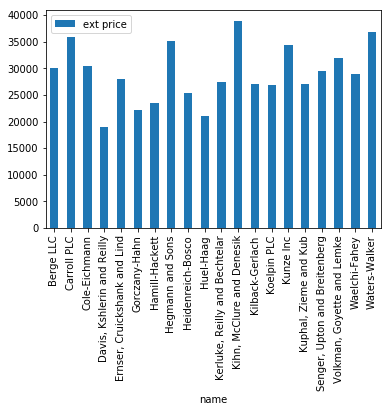

In [12]:
my_plot = sales_totals.plot(kind='bar')

Text(0,0.5,'Sales ($)')

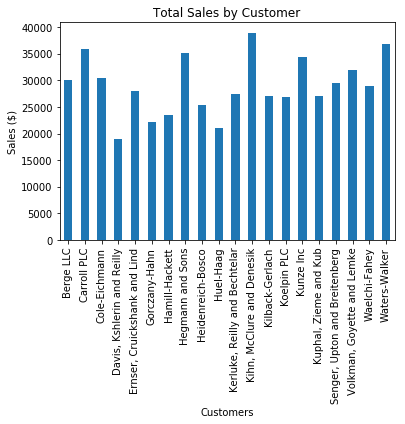

In [13]:
#Unfortunately this chart is a little ugly. With a few tweaks we can make it a little more impactful. Let’s try:

#sorting the data in descending order
#removing the legend
#adding a title
#labeling the axes
my_plot = sales_totals.plot(kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

In [14]:
#This actually tells us a little about our biggest customers and how much difference there is between their sales 
#and our smallest customers.

#Now, let’s try to see how the sales break down by category.

customers = sales[['name','category','ext price','date']]
customers.head()

,name,category,ext price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:24
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:27


In [15]:
#We can use groupby to organize the data by category and name.
category_group=customers.groupby(['name','category']).sum()
category_group.head()

ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61

In [16]:
#The category representation looks good but we need to break it apart to graph it as a stacked bar graph. 
#unstack can do this for us.

category_group.unstack().head()

ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly     1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind   5894.38  16944.19   5250.45

Text(0,0.5,'Sales')

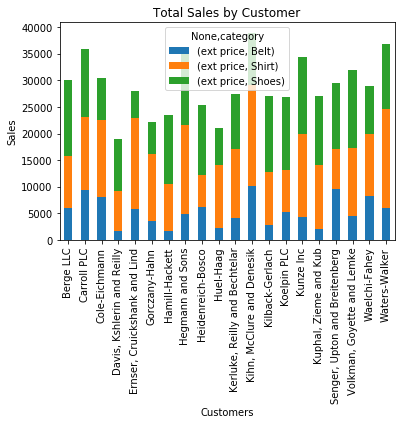

In [17]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")

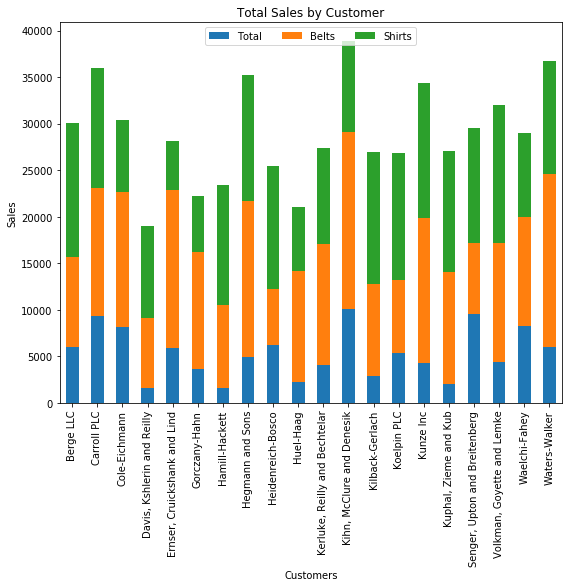

In [18]:
#In order to clean this up a little bit, we can specify the figure size and customize the legend.

my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)

In [19]:
#Now that we know who the biggest customers are and how they purchase products, we might want to look at purchase patterns 
#in more detail.

#Let’s take another look at the data and try to see how large the individual purchases are. 
#A histogram allows us to group purchases together so we can see how big the customer transactions are.

In [20]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


Text(0,0.5,'Number of orders')

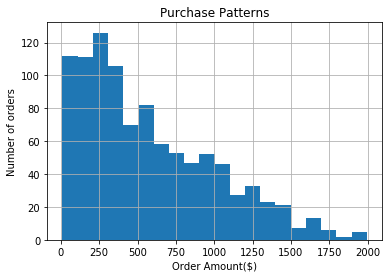

In [26]:
#We can create a histogram with 20 bins to show the distribution of purchasing patterns.

purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

In [27]:
#In looking at purchase patterns over time, we can see that most of our transactions are less than $500 and only a very few 
#are about $1500.

#Another interesting way to look at the data would be by sales over time. A chart might help us understand, 
#“Do we have certain months where we are busier than others?”

#Let’s get the data down to order size and date.

purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


In [28]:
#If we want to analyze the data by date, we need to set the date column as the index using set_index .

purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

,ext price
date,
2014-09-27 07:13:03,578.24
2014-07-29 02:10:44,1018.78
2014-03-01 10:51:24,289.92
2013-11-17 20:41:11,413.40
2014-01-03 08:14:27,1793.52


In [29]:
#One of the really cool things that pandas allows us to do is resample the data. 
#If we want to look at the data by month, we can easily resample and sum it all up. 
#You’ll notice I’m using ‘M’ as the period for resampling which means the data should be resampled on a month boundary.

purchase_patterns.resample('M',how=sum)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """


,ext price
date,
2013-10-31,14085.27
2013-11-30,44932.78
2013-12-31,57752.23
2014-01-31,53161.35
2014-02-28,51783.56
2014-03-31,44991.85
2014-04-30,34098.05
2014-05-31,50001.02
2014-06-30,37477.65


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


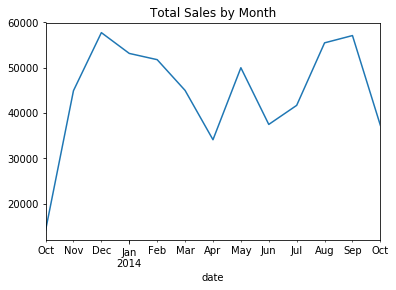

In [30]:
purchase_plot = purchase_patterns.resample('M',how=sum).plot(title="Total Sales by Month",legend=None)

In [37]:
#end